## PROYECTO No. 1 BIOSEÑALES

* Esteban Maya CC. 1004540273

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import scipy.io as sio
from scipy.stats import shapiro, levene, mannwhitneyu

In [ ]:
archivos_control = glob.glob('./control/*.mat') # Creación de lista en donde estan todos los archivos .mat de control
archivos_parkinson = glob.glob('./parkinson/*.mat')# Creación de lista en donde estan todos los archivos .mat de parkinson
print('Hay ' + str(len(archivos_control)) + ' sujetos de control')
print('Hay ' + str(len(archivos_parkinson)) + ' sujetos de parkinson')

Hay 36 sujetos de control
Hay 23 sujetos de parkinson


### 1. Crear una función que reciba una señal de EEG y permita calcular la densidad espectral de potencia para la señal EEG. 
---


In [ ]:
def calcular_PSD(signal_EEG): # definición de la función 
"Cálculo de la densidad espectral de potencia para datos de eeg unidimensionales   "
    N = len(signal_EEG)
    wn= 0.42-0.5*np.cos(2*np.pi*np.arange(N)/(N-1))
    xn_wn= signal_EEG*wn
    sk=[]
    for k in range(N): # El rango esta dado para toda la longitud de la señal (2000 puntos )
        s = np.sum(xn_wn * np.exp(-2*np.pi*1j*np.arange(N)*k/N))
        sk.append((np.abs(s)**2)/N)
    return sk

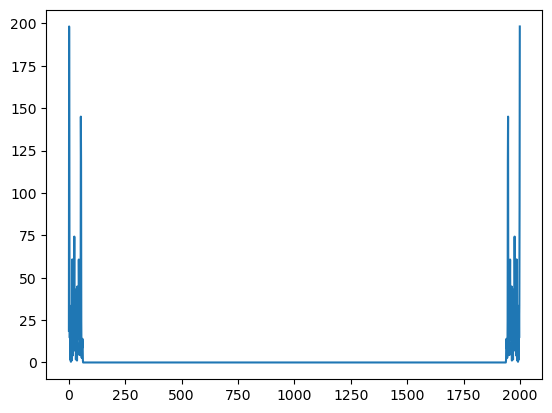

In [ ]:
N=len(canal1)
v=np.arange(N)

plt.plot(v,psd)

### 2. Crear una función que reciba una señal EEG de múltiples épocas, un canal, y devuelva la sumatoria de densidad espectral de potencia, para el rango de frecuencia de 13 a 30 Hz, del promedio de la densidad espectral de potencia de las diferentes épocas de la señal de análisis


In [ ]:
prueba=sio.loadmat(archivos_control[0]) # Carga de datos de prueba, se carga el primer sujeto 
data_c=prueba['data']; # carga de solo los datos
data_control=data_c.copy() # creación de una copia 
canal1=data_control[0] # Un canal con multiples epocas 

psd=calcular_PSD2(canal1[:,0])


In [ ]:
def calcular_PSD2(signal_EEG): # Creación de una función que calcula la densidad espectral de potencia en una frecuencia determinada 
    N = len(signal_EEG)
    wn= 0.42-0.5*np.cos(2*np.pi*np.arange(N)/(N-1))
    xn_wn= signal_EEG*wn
    sk=[]
    for k in np.arange(26,61): # Frecuencia a tener en consideración 
        s = np.sum(xn_wn * np.exp(-2*np.pi*1j*np.arange(N)*k/N))
        sk.append((np.abs(s)**2)/N)
    return sk

In [ ]:
def mean_epoch(canal):
    epocas=canal.shape[1]
    psd=[]
    mean=[]
    for i in range(epocas):
        psds=calcular_PSD2(canal1[:,i]) # Calcula primero el PSD
        psd.append(psds)
    mean_psd=np.mean(psd,axis=0) # Despues promedia 
    mean.append(mean_psd)
    return np.sum(mean_psd) # Devuelve la sumatoria

In [ ]:
ejemplo= mean_epoch(canal1)
ejemplo

28.26586692586665

### 3. Crear una función que reciba una señal EEG de múltiples canales y múltiples épocas y devuelva los valores calculados en el punto para cada canal por separado

In [ ]:
data_control.shape # Se encuentra la relación de (canales, puntos, épocas)

(8, 2000, 140)

In [ ]:
def psd_multichannel(data_control): # Recibe una señal de multiples canales y multiples epocas 
    canales= data_control.shape[0]
    epocas=data_control.shape[2]
    s_channels=[]
    mean_psd=[]
    sumatoria=[]
    for i in range(canales):
        for j in range(epocas):
            psds= calcular_PSD2(data_control[i,:,j])
            s_channels.append(psds)
        mean= np.mean(s_channels,axis=0)
        mean_psd.append(mean)
        suma= np.sum(mean)        
        sumatoria.append(suma)
    return mean_psd, sumatoria # Retorna promedio y la sumatoria

In [ ]:
mean,suma= psd_multichannel(data_control)


### 4.Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 y almacene los resultados en un dataframe donde se pueda discriminar nombre sujeto, control o paciente y el promedio de densidad espectral de potencia para cada canal, por ejemplo

In [ ]:
archivos_TOTAL= []
archivos_TOTAL.extend(archivos_control),archivos_TOTAL.extend(archivos_parkinson)
archivos_TOTAL # Se unen todas las rutas de los archivos .mat en una sola 

['./control\\C001R_EP_reposo.mat',
 './control\\C002_EP_reposo.mat',
 './control\\C004_EP_reposo.mat',
 './control\\C005_EP_reposo_Repetido.mat',
 './control\\C006_EP_reposo.mat',
 './control\\C007_EP_reposo.mat',
 './control\\C010_EP_reposo.mat',
 './control\\C011_EP_reposo.mat',
 './control\\C012_EP_reposo.mat',
 './control\\C013_EP_reposo.mat',
 './control\\C015_EP_reposo.mat',
 './control\\C018_EP_reposo.mat',
 './control\\C019_EP_reposo.mat',
 './control\\C020_EP_reposo.mat',
 './control\\C021_EP_reposo.mat',
 './control\\C023_EP_reposo.mat',
 './control\\C024_EP_reposo.mat',
 './control\\C025_EP_reposo.mat',
 './control\\C026_EP_reposo.mat',
 './control\\C027_EP_reposo.mat',
 './control\\C028_EP_reposo.mat',
 './control\\C029_EP_reposo.mat',
 './control\\C030_EP_reposo.mat',
 './control\\C031_EP_reposo.mat',
 './control\\C032_EP_reposo.mat',
 './control\\C033R_EP_reposo.mat',
 './control\\C034_EP_reposo.mat',
 './control\\C036_EP_reposo.mat',
 './control\\C037_EP_reposo.mat',
 '.

In [ ]:
results= []
estados=[]
for archivo in archivos_TOTAL: #RECORRE TODOS LOS ARCHIVOS DE LA LISTA ANTERIOR 
    estado=archivo.split("/")[1].split("\\")[0] # Estado de los pacientes 
    estados.append(estado)
    mat_contents = sio.loadmat(archivo)
    data_original = mat_contents['data'];
    data = data_original.copy()
    psd, psd_sum = psd_multichannel(data)
    results.append(psd_sum)
df_pacientes=pd.DataFrame(results) # Creación del dataframe 
df_pacientes.index = np.arange(1, len(df_pacientes)+1) #El index comienza desde 1
df_pacientes.index.names = ['#sujeto']
df_pacientes.columns = ['PSD_C3', 'PSD_C1', 'PSD_CZ', 'PSD_C2', 'PSD_C4', 'PSD_O1', 'PSD_OZ', 'PSD_O2']
df_pacientes.insert(0,"Estado",estados) #Se inserta la columna "Estado"
df_pacientes

,Estado,PSD_C3,PSD_C1,PSD_CZ,PSD_C2,PSD_C4,PSD_O1,PSD_OZ,PSD_O2
#sujeto,,,,,,,,,
1,control,1325.396207,1267.495008,1244.077212,1202.779542,1200.587250,1245.176955,1235.021903,1257.634077
2,control,665.873094,667.824073,712.831208,740.966971,747.015353,996.722196,1092.294707,1179.334451
3,control,686.942884,592.841756,673.104357,604.014519,650.274709,624.358886,609.740284,623.600735
4,control,1709.321939,1480.709797,1416.874223,1394.469240,1482.060410,1686.392802,1809.907697,1927.931226
5,control,1140.854115,1149.300418,1155.562918,1180.228937,1212.656484,1336.670803,1352.080039,1381.104538
6,control,755.256052,680.208258,695.163991,683.228867,693.009217,717.457885,733.686808,766.047874
7,control,633.375343,624.739430,652.201311,640.477261,646.556474,669.347365,662.362514,703.901638
8,control,850.926585,704.856535,667.219383,647.282929,719.385306,803.860831,823.107180,857.207164
9,control,285.562820,273.881502,283.874292,283.943431,288.845161,461.064314,580.438076,678.020048


In [ ]:
df_pacientes.to_csv("TabladeResultados.csv",index=False) # Se exporta el dataframe como un archivo.csv para trabajar con mayor facilidad 

### Discusión de las diferencias en los grupos usando las gráficas obtenidas usando estadística descriptiva

In [2]:
df= pd.read_csv("TabladeResultados.csv") #Se importa el archivo con los datos
print(df.head(),df.info()) # Se corrobora la información 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Estado  59 non-null     object 
 1   PSD_C3  59 non-null     float64
 2   PSD_C1  59 non-null     float64
 3   PSD_CZ  59 non-null     float64
 4   PSD_C2  59 non-null     float64
 5   PSD_C4  59 non-null     float64
 6   PSD_O1  59 non-null     float64
 7   PSD_OZ  59 non-null     float64
 8   PSD_O2  59 non-null     float64
dtypes: float64(8), object(1)
memory usage: 4.3+ KB
    Estado       PSD_C3       PSD_C1       PSD_CZ       PSD_C2       PSD_C4  \
0  control  1325.396207  1267.495008  1244.077212  1202.779542  1200.587250   
1  control   665.873094   667.824073   712.831208   740.966971   747.015353   
2  control   686.942884   592.841756   673.104357   604.014519   650.274709   
3  control  1709.321939  1480.709797  1416.874223  1394.469240  1482.060410   
4  control  1140.854115  1149.300418  1155.5

In [3]:
df_control=df[df['Estado'] == 'control'] # Se definen los pacientes de control
df_parkinson = df[df['Estado'] == 'parkinson'] # Se definen los pacientes de parkinson 

In [6]:
x=['Promedio','Varianza','Desviación estandar','Mediana'] # Creación de una lista con las pruebas estadisticas que se van a utilizar

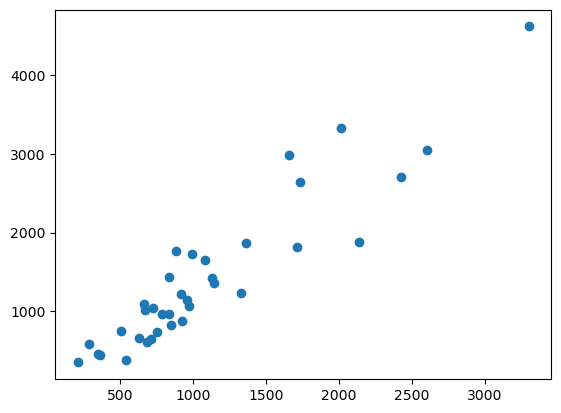

In [11]:
plt.scatter(df_control['PSD_C3'],df_control['PSD_OZ'])

*Definición de función graficar*

In [14]:
def graficar(control, parkinson, estadistica): # Toma los datos de control, parkinson y la prueba estadistica 
    labels = ['C3', 'C1', 'CZ', 'C2', 'C4', 'O1', 'OZ', 'O2']
    fig, ax = plt.subplots()
    width = 0.35  # the width of the bars
    x = np.arange(len(labels))

    # Definición de los valores de las barras 
    rects1 = ax.bar(x - width/2, control, width, label='Control')
    rects2 = ax.bar(x + width/2, parkinson, width, label='Parkinson')

    # Definición de las barras de error
    errors1 = np.std(control)
    errors2 = np.std(parkinson)

    ax.errorbar(x - width/2, control, yerr=errors1, fmt='none', capsize=5, color='red')
    ax.errorbar(x + width/2, parkinson, yerr=errors2, fmt='none', capsize=5, color='red')

    ax.set_xticks(x) # Se establecen los limites del eje 
    ax.set_xticklabels(labels)
    fig.tight_layout()
    ax.set_ylabel(str(estadistica)+' PSD') # concatena el nombre de la prueba estadistica con el eje Y
    ax.set_xlabel('Canales')
    ax.set_title(str(estadistica)+' de la Densidad espectral de potencia para cada grupo en cada canal') # Concatena el nombre de la prueba estadistica con el titulo de la figura 
    ax.legend(loc="center") # Localización de la leyenda 

    plt.show()


* Promedio de los grupos

---





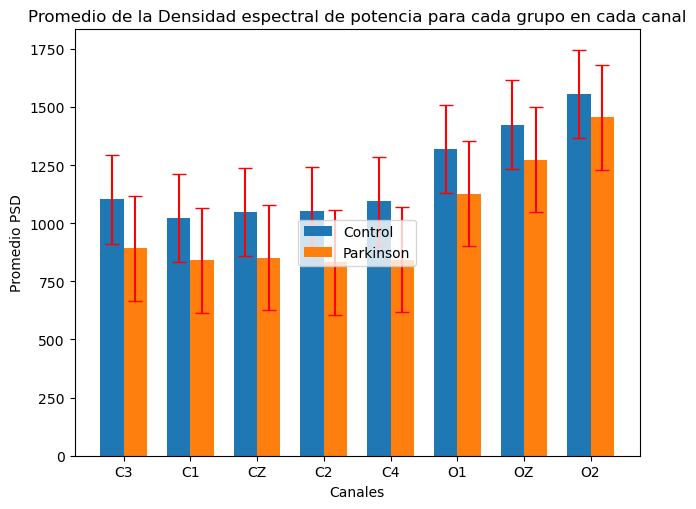

---------------------------------------

 Promedio PSD Grupo Control 


PSD_C3    1102.366321
PSD_C1    1023.671329
PSD_CZ    1048.258435
PSD_C2    1052.322572
PSD_C4    1093.777248
PSD_O1    1318.570277
PSD_OZ    1424.485206
PSD_O2    1556.592467
dtype: float64
---------------------------------------

 Promedio PSD Grupo Parkinson 


PSD_C3     892.655023
PSD_C1     841.048081
PSD_CZ     851.013723
PSD_C2     831.437140
PSD_C4     843.208924
PSD_O1    1127.112728
PSD_OZ    1273.049333
PSD_O2    1455.063112
dtype: float64


In [15]:
"la PSD es una medida de la actividad cerebral en términos de contenido de frecuencia. El promedio de la PSD se puede utilizar para identificar patrones de actividad cerebral"
promedio_control,promedio_parkinson= np.mean(df_control),np.mean(df_parkinson)
graficar(promedio_control,promedio_parkinson,x[0])

print('---------------------------------------\n\n Promedio PSD Grupo Control \n\n')
print(promedio_control)
print('---------------------------------------\n\n Promedio PSD Grupo Parkinson \n\n')
print(promedio_parkinson)




*   Varianza de los grupos

---





/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3755: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


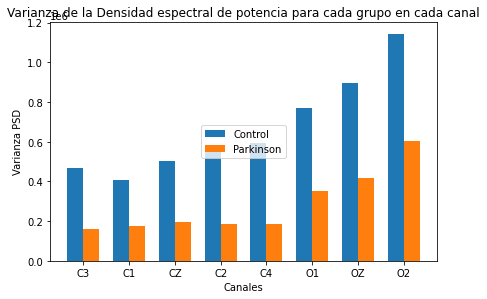

---------------------------------------

 Varianza PSD Grupo Control 


PSD_C3    4.669062e+05
PSD_C1    4.064287e+05
PSD_CZ    5.040609e+05
PSD_C2    5.765633e+05
PSD_C4    5.938065e+05
PSD_O1    7.685374e+05
PSD_OZ    8.982731e+05
PSD_O2    1.144131e+06
dtype: float64
---------------------------------------

 Varianza PSD Grupo Parkinson 


PSD_C3    160904.190920
PSD_C1    175133.730785
PSD_CZ    197945.309479
PSD_C2    187899.625176
PSD_C4    183258.537669
PSD_O1    351212.680317
PSD_OZ    418668.569579
PSD_O2    605180.885833
dtype: float64


In [ ]:
"La varianza de la PSD proporciona información sobre la variabilidad de la actividad cerebral en diferentes regiones del cerebro"
varianza_control, varianza_parkinson = np.var(df_control,axis=0), np.var(df_parkinson,axis=0)
graficar(varianza_control,varianza_parkinson,x[1])

print('---------------------------------------\n\n Varianza PSD Grupo Control \n\n')
print(varianza_control)
print('---------------------------------------\n\n Varianza PSD Grupo Parkinson \n\n')
print(varianza_parkinson)

* Desviación estandar de los grupos 
---

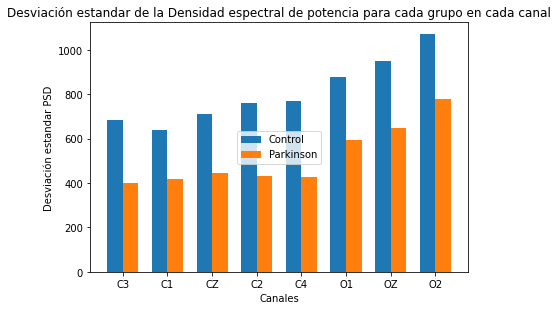

---------------------------------------

 Desviación estandar PSD Grupo Control 


PSD_C3     683.305360
PSD_C1     637.517598
PSD_CZ     709.972490
PSD_C2     759.317668
PSD_C4     770.588426
PSD_O1     876.662621
PSD_OZ     947.772709
PSD_O2    1069.640485
dtype: float64
---------------------------------------

 Desviación estandar PSD Grupo Parkinson 


PSD_C3    401.128646
PSD_C1    418.489822
PSD_CZ    444.910451
PSD_C2    433.473904
PSD_C4    428.087068
PSD_O1    592.631994
PSD_OZ    647.046034
PSD_O2    777.933728
dtype: float64


In [ ]:
" puede utilizarse para identificar regiones cerebrales que son más estables o inestables en términos de su actividad"
std_control, std_parkinson = np.std(df_control,axis=0), np.std(df_parkinson,axis=0)
graficar(std_control,std_parkinson,x[2])

print('---------------------------------------\n\n Desviación estandar PSD Grupo Control \n\n')
print(std_control)
print('---------------------------------------\n\n Desviación estandar PSD Grupo Parkinson \n\n')
print(std_parkinson)

* Mediana de los grupos 


In [ ]:
# Como el dataframe de los grupos contiene una columna tipo str se elimina en una copia del df para poder calcular la mediana
df_controlC= df_control.copy()
df_controlC= df_controlC.drop(['Estado'],axis=1)

df_parkinsonC= df_parkinson.copy()
df_parkinsonC=df_parkinsonC.drop(['Estado'],axis=1)

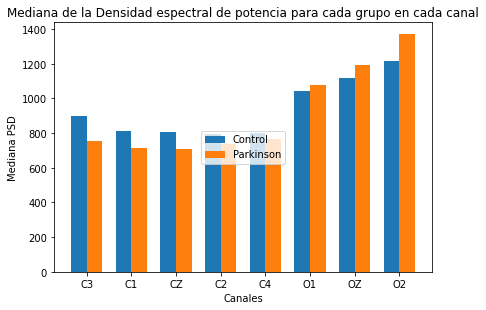

---------------------------------------

 Mediana PSD Grupo Control 


[901.2732932124611, 811.9605079664691, 804.9028452068935, 796.7211048674687, 802.173118610544, 1040.9995005517883, 1119.6415978366135, 1215.6681408035074]
---------------------------------------

 Mediana PSD Grupo Parkinson 


[756.6386869767521, 713.9209669791545, 708.8808641640464, 737.9855423463134, 768.786313265446, 1079.8321311257043, 1194.3702523436616, 1370.1147723869235]


In [ ]:
"La mediana de la PSD puede ser útil para identificar cambios en la actividad cerebral que no se reflejan en el promedio de la PSD"
median_control, median_parkinson= np.median(df_controlC,axis=0), np.median(df_parkinsonC,axis=0)
graficar(median_control, median_parkinson,x[3])
print('---------------------------------------\n\n Mediana PSD Grupo Control \n\n')
print(list(median_control))
print('---------------------------------------\n\n Mediana PSD Grupo Parkinson \n\n')
print(list(median_parkinson))

* Diagrama de bigotes

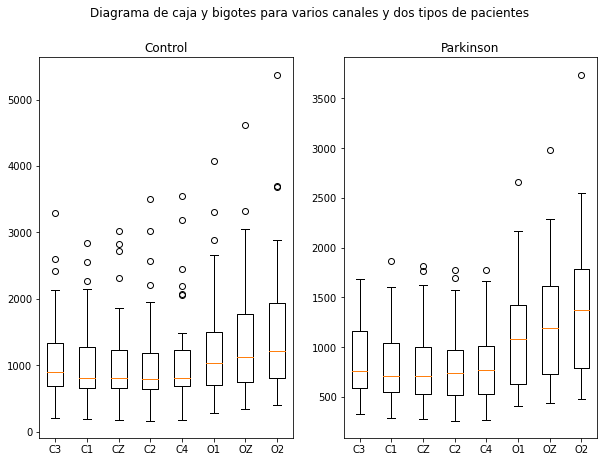

In [ ]:
"Un diagrama de cajas y bigotes muestra la distribución de los valores de la PSD para cada canal en términos de cuartiles y valores extremos, lo que puede permitir una comparación visual de la actividad cerebral en diferentes regiones del cerebro."
dataframes = [df_controlC,df_parkinsonC] # Se unifican los dataframes

# Crear una lista de nombres para las etiquetas del gráfico
labels = ['Control', 'Parkinson']
labels1=['C3', 'C1', 'CZ', 'C2', 'C4', 'O1', 'OZ', 'O2']
# Crear una figura y dos subplots (uno por cada estado)
fig, axs = plt.subplots(1, 2, figsize=(10,7))

# Para cada estado y subplot, hacer un diagrama de caja y bigotes para cada canal
for i, df_estado in enumerate(dataframes):
    axs[i].boxplot([df_estado['PSD_C3'], df_estado['PSD_C1'], df_estado['PSD_CZ'], df_estado['PSD_C2'], df_estado['PSD_C4'], df_estado['PSD_O1'], df_estado['PSD_OZ'], df_estado['PSD_O2']])
    axs[i].set_title(labels[i])
    axs[i].set_xticklabels(labels1)
fig.suptitle('Diagrama de caja y bigotes para varios canales y dos tipos de pacientes')
plt.show()

Notese que hay alta presencia de valores atipicos en ambos grupos, tanto en el de control como en el de parkinson, lo que es indicativo de errores en los datos o de condiciones extremas en el conjunto de datos. Es decir, estos pueden ser representativos de eventos fisiológicos reales, como artefactos de movimiento o interferencias electromagnéticas por lo que su eliminación conllevaría a perder información del EEG. 

Al observar las dimensiones de las cajas es posible determinar el rango intercuartilico en el que se encuentran los datos de cada canal, lo que nos lleva a observar que esta dimensión es mayor para el grupo de parkinson, quienes a pesar de mostrar menos cantidad de datos atipicos muestran más dispersión de los datos con respecto a la mediana, es decir, mayor variabilidad en la actividad cerebral.

Notese que ambos grupos tienen una distribución equidistante de sus datos y que los canales que mayor dispersión de datos son los canales de O1, OZ y O2 lo que indica una mayor variabilidad en la actividad cerebral y los determina como objeto de estudio para ambos. 

# Pruebas de Hipótesis

### Supuestos:
Independiencia: Se supone independiencia ya que las dos poblaciones son diferentes

Normalidad: prueba Shapiro-Wilk,datasets con n<50. 
Las hipótesis son:
H0 = La distribución de los datos es normal.

H1 = La distribución de los datos no es normal.

p > 0.05, 95% de certeza de que los datos están distribuidos de manera normalizada.

Prueba de normalidad para la población de control

In [ ]:
alpha_shapiro_ct = 0.05
for col in df_controlC.columns: #Para cada columna presente en el dataframe de control
    stat, p = shapiro(list(df_controlC[col])) #Implementación de la prueba Shapiro-Wilk
    print(f'Grupo de control - Canal {col}: Estadístico de prueba={stat:.3f}, p={p:.3f}')
    if p > alpha_shapiro_ct:
        print(f'Los datos del Canal {col} del grupo de control parecen seguir una distribución normal (no se puede rechazar la hipótesis nula)\n')
    else:
        print(f'Los datos del Canal {col} del grupo de control no parecen seguir una distribución normal (se rechaza la hipótesis nula)\n')

Grupo de control - Canal PSD_C3: Estadístico de prueba=0.869, p=0.001
Los datos del Canal PSD_C3 del grupo de control no parecen seguir una distribución normal (se rechaza la hipótesis nula)

Grupo de control - Canal PSD_C1: Estadístico de prueba=0.875, p=0.001
Los datos del Canal PSD_C1 del grupo de control no parecen seguir una distribución normal (se rechaza la hipótesis nula)

Grupo de control - Canal PSD_CZ: Estadístico de prueba=0.835, p=0.000
Los datos del Canal PSD_CZ del grupo de control no parecen seguir una distribución normal (se rechaza la hipótesis nula)

Grupo de control - Canal PSD_C2: Estadístico de prueba=0.822, p=0.000
Los datos del Canal PSD_C2 del grupo de control no parecen seguir una distribución normal (se rechaza la hipótesis nula)

Grupo de control - Canal PSD_C4: Estadístico de prueba=0.827, p=0.000
Los datos del Canal PSD_C4 del grupo de control no parecen seguir una distribución normal (se rechaza la hipótesis nula)

Grupo de control - Canal PSD_O1: Estadís

* Prueba de normalidad para la población con parkinson 

In [ ]:
alpha_shapiro_ct = 0.05
for col in df_parkinsonC.columns: #Para cada columna presente en el dataframe de control
    stat, p = shapiro(list(df_parkinsonC[col])) #Implementación de la prueba Shapiro-Wilk
    print(f'Grupo de control - Canal {col}: Estadístico de prueba={stat:.3f}, p={p:.3f}')
    if p > alpha_shapiro_ct:
        print(f'Los datos del Canal {col} del grupo de control parecen seguir una distribución normal (no se puede rechazar la hipótesis nula)\n')
    else:
        print(f'Los datos del Canal {col} del grupo de control no parecen seguir una distribución normal (se rechaza la hipótesis nula)\n')

Grupo de control - Canal PSD_C3: Estadístico de prueba=0.913, p=0.047
Los datos del Canal PSD_C3 del grupo de control no parecen seguir una distribución normal (se rechaza la hipótesis nula)

Grupo de control - Canal PSD_C1: Estadístico de prueba=0.908, p=0.037
Los datos del Canal PSD_C1 del grupo de control no parecen seguir una distribución normal (se rechaza la hipótesis nula)

Grupo de control - Canal PSD_CZ: Estadístico de prueba=0.883, p=0.012
Los datos del Canal PSD_CZ del grupo de control no parecen seguir una distribución normal (se rechaza la hipótesis nula)

Grupo de control - Canal PSD_C2: Estadístico de prueba=0.890, p=0.016
Los datos del Canal PSD_C2 del grupo de control no parecen seguir una distribución normal (se rechaza la hipótesis nula)

Grupo de control - Canal PSD_C4: Estadístico de prueba=0.908, p=0.037
Los datos del Canal PSD_C4 del grupo de control no parecen seguir una distribución normal (se rechaza la hipótesis nula)

Grupo de control - Canal PSD_O1: Estadís

Notese que los canales O1 y OZ siguen una distribución normal para el grupo de parkinson. 

### Pruebas de homocedasticidad
---
Para las pruebas de homocedasticidad haremos uso de la prueba de Levene. 
Se establece:

Hipótesis nula (H0): La varianza poblacional es constante

Hipótesis alternativa (H1): La varianza poblacional no es constante

Nivel de significancia de 0.05

In [ ]:
alpha_levene = 0.05
for col in df_controlC.columns:
    stat, p = levene(list(df_controlC[col]), list(df_parkinsonC[col]))#Implementación de la prueba levene
    print(f'Canal {col}: Estadístico de prueba={stat:.3f}, p={p:.3f}')
    if p > alpha_levene:
        print(f'Las varianzas de los canales {col} parecen ser constantes entre los grupos (no se puede rechazar la hipótesis nula)\n')
    else:
        print(f'Las varianzas de los canales {col} no parecen ser constantes entre los grupos (se rechaza la hipótesis nula)\n')

Canal PSD_C3: Estadístico de prueba=1.514, p=0.224
Las varianzas de los canales PSD_C3 parecen ser constantes entre los grupos (no se puede rechazar la hipótesis nula)

Canal PSD_C1: Estadístico de prueba=1.211, p=0.276
Las varianzas de los canales PSD_C1 parecen ser constantes entre los grupos (no se puede rechazar la hipótesis nula)

Canal PSD_CZ: Estadístico de prueba=1.236, p=0.271
Las varianzas de los canales PSD_CZ parecen ser constantes entre los grupos (no se puede rechazar la hipótesis nula)

Canal PSD_C2: Estadístico de prueba=1.534, p=0.221
Las varianzas de los canales PSD_C2 parecen ser constantes entre los grupos (no se puede rechazar la hipótesis nula)

Canal PSD_C4: Estadístico de prueba=1.666, p=0.202
Las varianzas de los canales PSD_C4 parecen ser constantes entre los grupos (no se puede rechazar la hipótesis nula)

Canal PSD_O1: Estadístico de prueba=0.992, p=0.323
Las varianzas de los canales PSD_O1 parecen ser constantes entre los grupos (no se puede rechazar la hip

Al determinar que las varianzas entre los grupos de estudio parecen ser constantes y que en la prueba de normalidad la mayoria no tiene una distribución normal, se procede a realizar la prueba U de Mann Whitney la cual es el equivalente no parametrico de la prueba t entre dos muestras

### Prueba U de Mann-Whitney
---
Para la prueba U de Mann-whitney se establece:

Hipótesis nula (H0): No existe diferencia estadística entre canales de cada grupo de sujetos.

Hipótesis alternativa (H1): Existe diferencia estadística entre canales de cada grupo de sujetos.

Nivel de significancia de 0.05

In [ ]:
alpha_u = 0.05
for col in df_controlC.columns:
    stat, p = mannwhitneyu(list(df_controlC[col]), list(df_parkinsonC[col]), alternative='two-sided')#Implementación de la prueba U de Mann-Whitney
    print(f'Canal {col}: Estadístico U={stat:.3f}, p={p:.3f}')
    if p > alpha_u:
        print(f'No se puede rechazar la hipótesis nula de que no existe diferencia estadística entre los datos del canal {col} de ambos grupos.\n')
    else:
        print(f'Se rechaza la hipótesis nula de que existe diferencia estadística entre los datos del canal {col} de ambos grupos.\n')

Canal PSD_C3: Estadístico U=484.000, p=0.280
No se puede rechazar la hipótesis nula de que no existe diferencia estadística entre los datos del canal PSD_C3 de ambos grupos.

Canal PSD_C1: Estadístico U=484.000, p=0.280
No se puede rechazar la hipótesis nula de que no existe diferencia estadística entre los datos del canal PSD_C1 de ambos grupos.

Canal PSD_CZ: Estadístico U=479.000, p=0.316
No se puede rechazar la hipótesis nula de que no existe diferencia estadística entre los datos del canal PSD_CZ de ambos grupos.

Canal PSD_C2: Estadístico U=475.000, p=0.347
No se puede rechazar la hipótesis nula de que no existe diferencia estadística entre los datos del canal PSD_C2 de ambos grupos.

Canal PSD_C4: Estadístico U=478.000, p=0.324
No se puede rechazar la hipótesis nula de que no existe diferencia estadística entre los datos del canal PSD_C4 de ambos grupos.

Canal PSD_O1: Estadístico U=445.000, p=0.635
No se puede rechazar la hipótesis nula de que no existe diferencia estadística e

A partir de la prueba U realizada se establece que no hay diferencia significativa entre las muestras de las poblaciones evaluadas. Sin embargo, esto no quiere decir que sean datos iguales, sino que no existen suficientes evidencias para determinar que las medianas son significativamente diferentes. 

De esta manera, es necesario hacer una evaluación con más pacientes para rechazar la hipotesis nula y afirmar que las medianas son significativamente diferentes.